Jan Paul Llatuna
BSIT - 3R8

Week 9 Classification and Regression Using Hold-out Method
Laboratory Activity



Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Load the dataset

In [19]:
df = pd.read_csv("datasets/diabetes.csv")

View the first few rows

In [20]:
print("First few rows:")
print(df.head())


First few rows:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0           never  27.32          5.0   

Check for missing values


In [21]:
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
clinical_notes          0
dtype: int64


Summary Statistics of numerical features

In [22]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.000

Check Data types

In [23]:
print("\nData Types:")
print(df.dtypes)



Data Types:
year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
clinical_notes           object
dtype: object


Count of diabetic and non-diabetic cases

In [26]:
print("\nCount of diabetic and non-diabetic cases:")
print(df['diabetes'].value_counts())


Count of diabetic and non-diabetic cases:
diabetes
0    91500
1     8500
Name: count, dtype: int64


Label Encoding

In [27]:

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

Plot the Class Distribution

Class Distribution

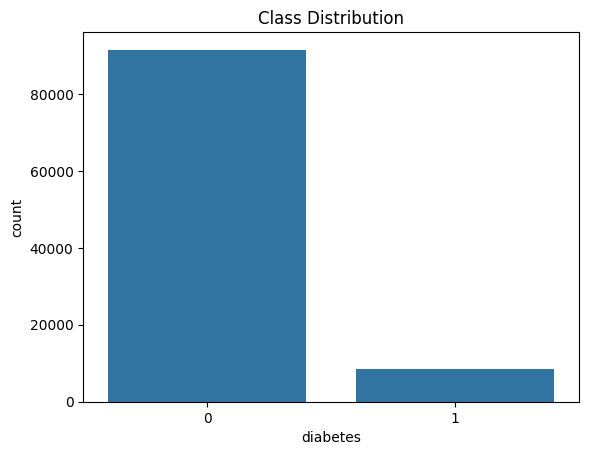

In [34]:
#Class Distribution
sns.countplot(x='diabetes', data=df)
plt.title("Class Distribution")
plt.xticks(rotation=0)  
plt.show()

Feature Correlation

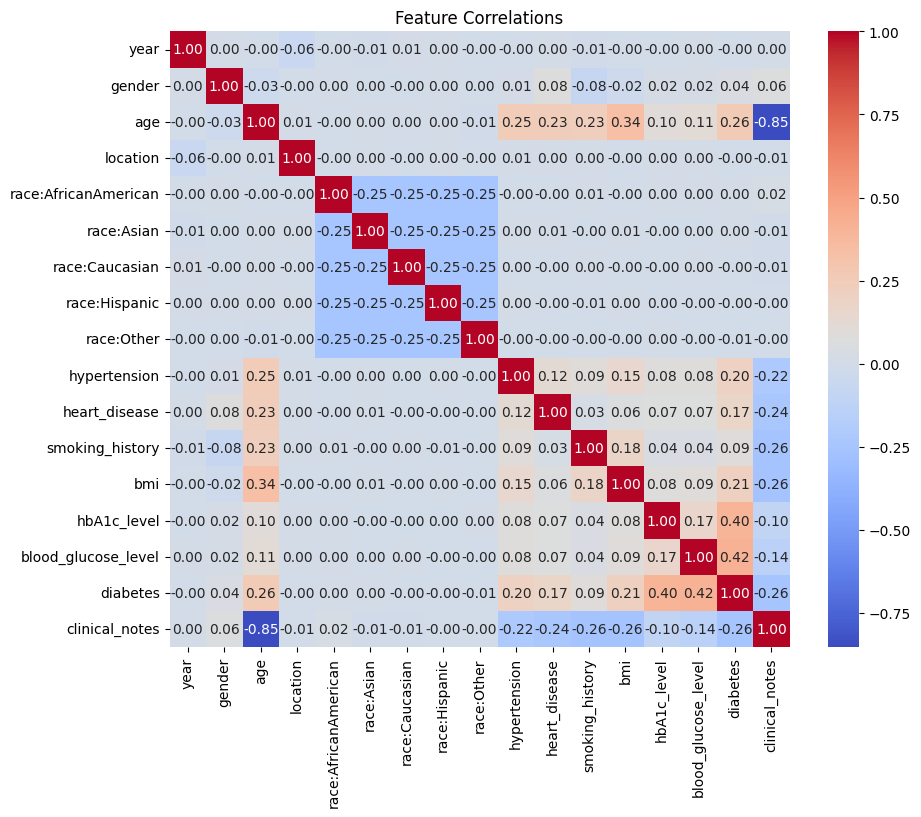

In [ ]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Feature Correlations")
plt.show()

Boxplot

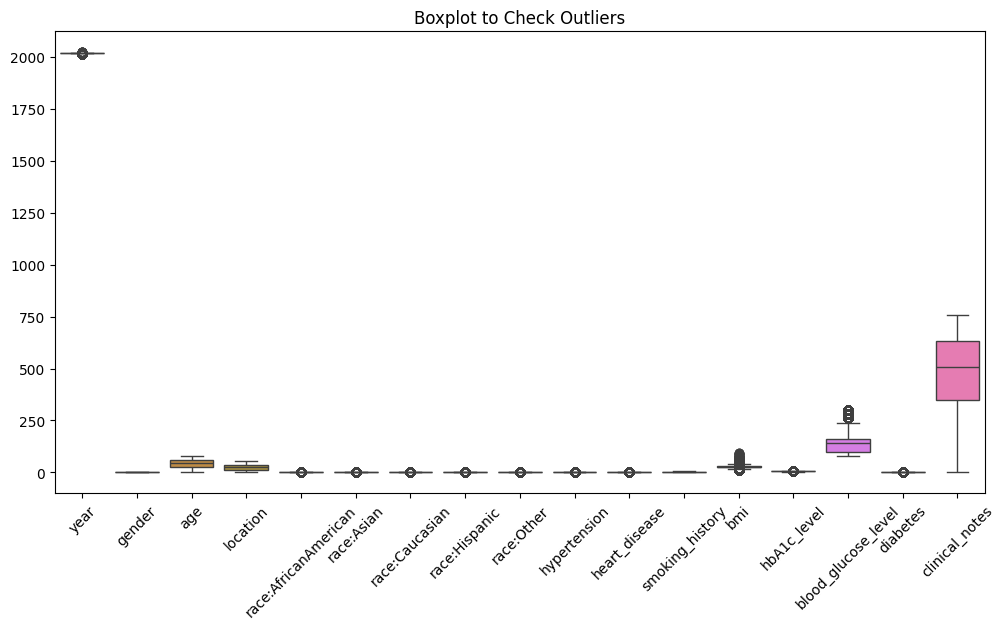

In [37]:
plt.figure(figsize=(12, 6))  # Increase width
sns.boxplot(data=df)
plt.title("Boxplot to Check Outliers")
plt.xticks(rotation=45) 
plt.show()

Perform Feature Selection. There are 17 attributes in the dataset. Drop those unnecessary columns. And extract 10 attributes only. Make justification why you choose those 10 attributes. 

In [38]:
# I selected these 9 attributes because they are key risk factors and indicators of diabetes. 
selected_features = [
    "age", "gender", "hypertension", "heart_disease", "smoking_history",
    "bmi", "hbA1c_level", "blood_glucose_level", "diabetes"
]


df_selected = df[selected_features]


Do a hold-out method. Split the data into training and test dataset. Identify the features and the target , then split into training and testing sets. Read about the ideal ratio of splitting your dataset. 

In [ ]:
# Define features (X) and target (y)
X = df_selected.drop(columns=['diabetes']) 
y = df_selected['diabetes']  

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm split
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (80000, 8), Testing Set: (20000, 8)


Build the following models 

In [40]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Store results
    model_results[name] = {
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.71      0.74      0.72      1703

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:
[[17779   518]
 [  448  1255]]

Naïve Bayes - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18297
           1       0.46      0.66      0.54      1703

    accuracy                           0.91     20000
   macro avg       0.71      0.79      0.74     20000
weighted avg       0.92      0.91      0.91     20000

Confusion Matrix:
[[16989  1308]
 [  585  1118]]

KNN - Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18297
           1       0.88      0.53 

Model Evaluation – Display the confusion matrix of each model. 

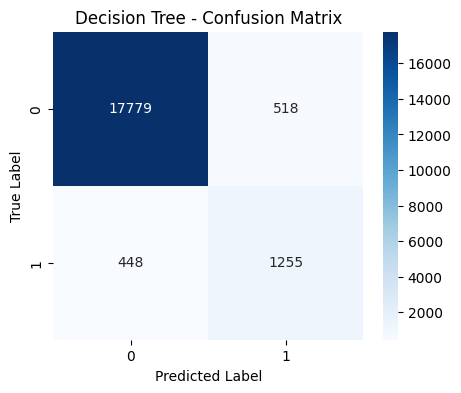

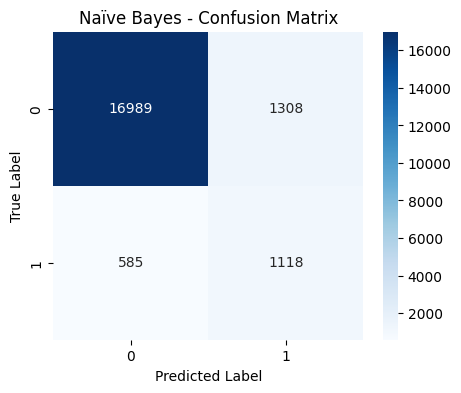

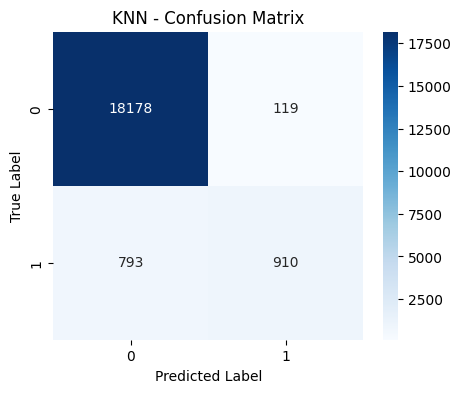

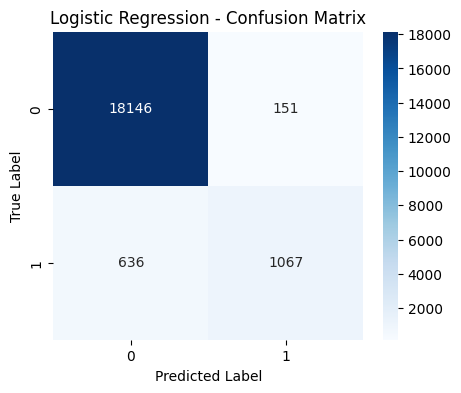

In [41]:
# Plot confusion matrices
for name, result in model_results.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

And display a comparison in terms of Accuracy, Precision, Recall, F1-score of each model. 

In [42]:
comparison_data = []

for name, result in model_results.items():
    report = result["classification_report"]
    comparison_data.append([
        name,
        report["accuracy"],
        report["macro avg"]["precision"],
        report["macro avg"]["recall"],
        report["macro avg"]["f1-score"]
    ])

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-score
0        Decision Tree   0.95170   0.841630  0.854312  0.847823
1          Naïve Bayes   0.90535   0.713777  0.792501  0.744382
2                  KNN   0.95440   0.921277  0.763924  0.820854
3  Logistic Regression   0.96065   0.921082  0.809144  0.854673


Conclusion: Based on the comparison results, Logistic Regression has the best performance overall.